In [11]:
import os
import pickle

with open(os.path.join('.', 'results', 'multigen_trial', 'results.pickle'), 'rb') as F:
    results = pickle.load(F).data

print(results.keys())
print([results[k].keys() for k in results.keys()])

dict_keys(['generator', 'discriminator'])
[dict_keys(['pretrain_train_loss', 'pretrain_val_loss', 'train_loss', 'val_loss', 'train_acc', 'val_acc']), dict_keys(['pretrain_train_loss', 'pretrain_val_loss', 'pretrain_train_acc', 'pretrain_val_acc', 'train_loss', 'val_loss', 'train_acc', 'val_acc', 'posttrain_train_loss', 'posttrain_val_loss', 'posttrain_train_acc', 'posttrain_val_acc'])]


No handles with labels found to put in legend.


Text(0.5, 0.98, 'Discriminator pretraining: predict key for raw traces')

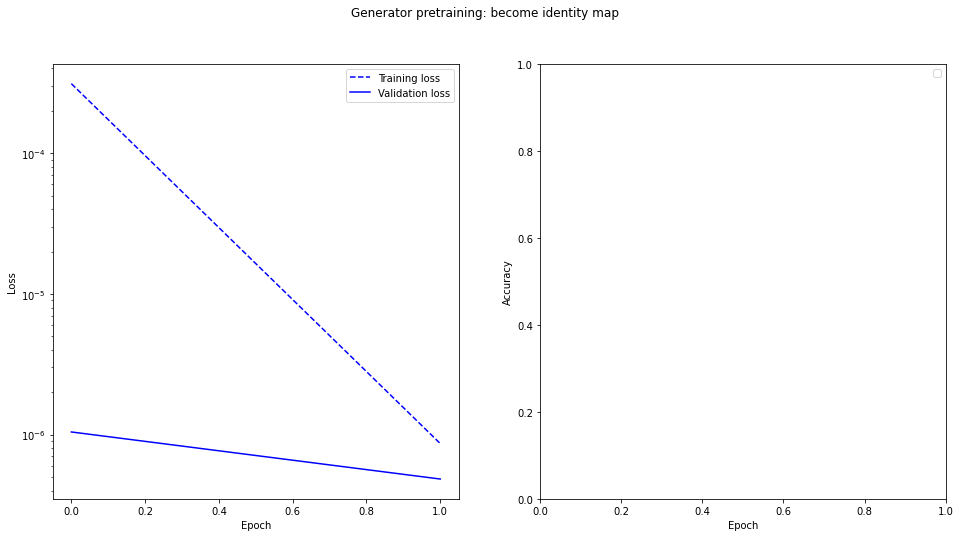

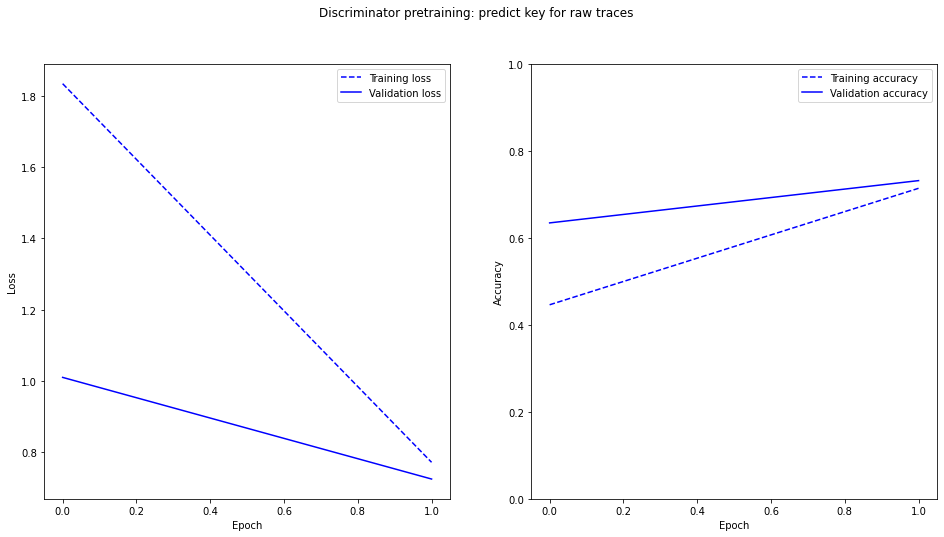

In [18]:
from matplotlib import pyplot as plt

gen_pretrain_train_loss = results['generator']['pretrain_train_loss']
gen_pretrain_valid_loss = results['generator']['pretrain_val_loss']
disc_pretrain_train_loss = results['discriminator']['pretrain_train_loss']
disc_pretrain_valid_loss = results['discriminator']['pretrain_val_loss']
disc_pretrain_train_acc = results['discriminator']['pretrain_train_acc']
disc_pretrain_valid_acc = results['discriminator']['pretrain_val_acc']

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(gen_pretrain_train_loss, linestyle='--', color='blue', label='Training loss')
ax[0].plot(gen_pretrain_valid_loss, linestyle='-', color='blue', label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)
ax[1].legend()
fig.suptitle('Generator pretraining: become identity map')

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(disc_pretrain_train_loss, linestyle='--', color='red', label='Training loss')
ax[0].plot(disc_pretrain_valid_loss, linestyle='-', color='red', label='Validation loss')
ax[1].plot(disc_pretrain_train_acc, linestyle='--', color='red', label='Training accuracy')
ax[1].plot(disc_pretrain_valid_acc, linestyle='-', color='red', label='Validation accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)
ax[1].legend()
fig.suptitle('Discriminator pretraining: predict key for raw traces')

Text(0.5, 0.98, 'Competitive training between discriminator and generator')

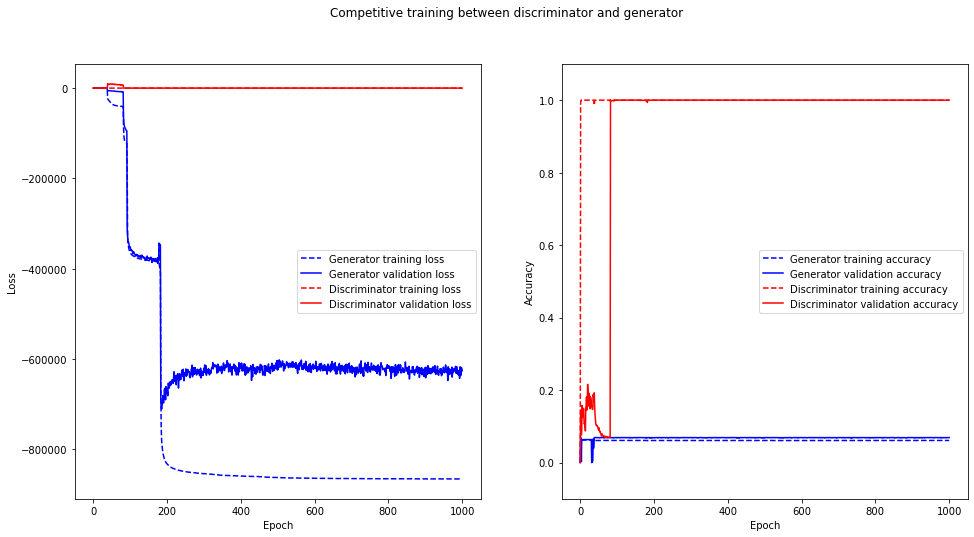

In [21]:
gen_train_loss = results['generator']['train_loss']
gen_valid_loss = results['generator']['val_loss']
gen_train_acc = results['generator']['train_acc']
gen_valid_acc = results['generator']['val_acc']
disc_train_loss = results['discriminator']['train_loss']
disc_valid_loss = results['discriminator']['val_loss']
disc_train_acc = results['discriminator']['train_acc']
disc_valid_acc = results['discriminator']['val_acc']

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(gen_train_loss, linestyle='--', color='blue', label='Generator training loss')
ax[0].plot(gen_valid_loss, linestyle='-', color='blue', label='Generator validation loss')
ax[0].plot(disc_train_loss, linestyle='--', color='red', label='Discriminator training loss')
ax[0].plot(disc_valid_loss, linestyle='-', color='red', label='Discriminator validation loss')
ax[1].plot(gen_train_acc, linestyle='--', color='blue', label='Generator training accuracy')
ax[1].plot(gen_valid_acc, linestyle='-', color='blue', label='Generator validation accuracy')
ax[1].plot(disc_train_acc, linestyle='--', color='red', label='Discriminator training accuracy')
ax[1].plot(disc_valid_acc, linestyle='-', color='red', label='Discriminator validation accuracy')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
#ax[0].set_yscale('log')
ax[1].set_ylim(-.1, 1.1)
ax[0].legend()
ax[1].legend()
fig.suptitle('Competitive training between discriminator and generator')

Text(0.5, 0.98, 'Discriminator training on fixed generator')

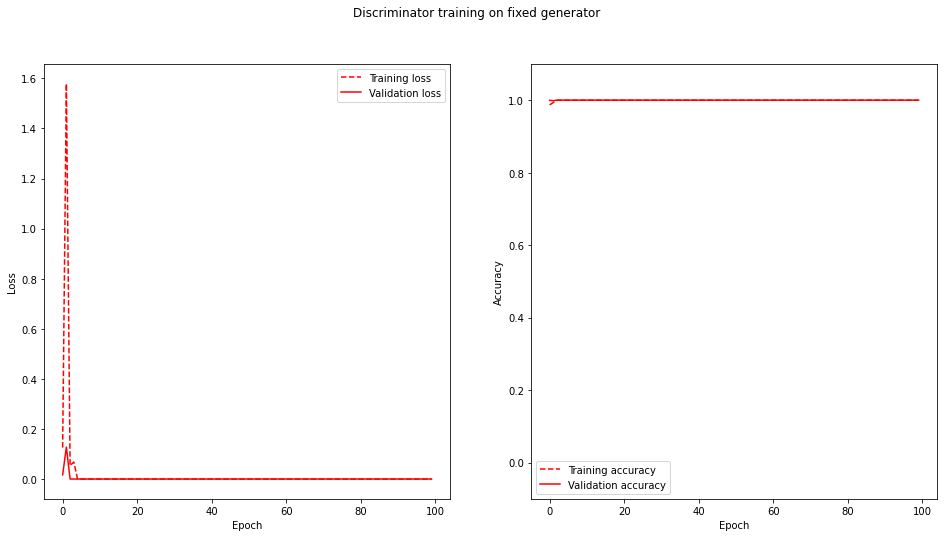

In [25]:
disc_posttrain_train_loss = results['discriminator']['posttrain_train_loss']
disc_posttrain_valid_loss = results['discriminator']['posttrain_val_loss']
disc_posttrain_train_acc = results['discriminator']['posttrain_train_acc']
disc_posttrain_valid_acc = results['discriminator']['posttrain_val_acc']

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(disc_posttrain_train_loss, linestyle='--', color='red', label='Training loss')
ax[0].plot(disc_posttrain_valid_loss, linestyle='-', color='red', label='Validation loss')
ax[1].plot(disc_posttrain_train_acc, linestyle='--', color='red', label='Training accuracy')
ax[1].plot(disc_posttrain_valid_acc, linestyle='-', color='red', label='Validation accuracy')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(-.1, 1.1)
ax[0].legend()
ax[1].legend()
fig.suptitle('Discriminator training on fixed generator')